In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## convert json to df and explore

In [2]:
endpoint0 = 'https://data.nashville.gov/resource/fuaa-r5cm.json'
response0 = requests.get(endpoint0)
res0 = response0.json()
res0

[{'month_name': 'January',
  'year': '2014',
  'query_count': '223',
  'query_text': 'ebid'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '112',
  'query_text': 'property maps'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '97',
  'query_text': 'maps'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '90',
  'query_text': 'property tax'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '76',
  'query_text': 'jobs'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '75',
  'query_text': 'employment'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '73',
  'query_text': 'human resources'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '62',
  'query_text': 'police'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '61',
  'query_text': 'criminal court clerk'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '53',
  'query_text': 'media releases'},
 {'mon

In [3]:
len(res0)
#this result is only because the default limit is 1000

1000

In [4]:
res0[0].keys()

dict_keys(['month_name', 'year', 'query_count', 'query_text'])

In [5]:
searches_df = pd.DataFrame(res0)
searches_df

,month_name,year,query_count,query_text
0,January,2014,223,ebid
1,January,2014,112,property maps
2,January,2014,97,maps
3,January,2014,90,property tax
4,January,2014,76,jobs
...,...,...,...,...
995,February,2014,7,pay stubs
996,February,2014,7,school lunch menu
997,February,2014,7,contractors permit bond
998,February,2014,7,media


1. Make an API request that returns the months where "fire" was searched in 2016. Which month had the most searches? August

In [6]:
endpoint1 =  'https://data.nashville.gov/resource/fuaa-r5cm.json?year=2016&query_text=fire'
response1 = requests.get(endpoint1)
res1 = response1.json()
searches_df = pd.DataFrame(res1)
searches_df['query_count'] = pd.to_numeric(searches_df['query_count'])

In [7]:
searches_df.loc[searches_df['query_count'].idxmax()]

month_name     August
year             2016
query_count        47
query_text       fire
Name: 7, dtype: object

2. Make an API request that returns all the times a query was run more than 100 times in a month. How many times did this occur? 1,262

In [8]:
endpoint2 =  'https://data.nashville.gov/resource/fuaa-r5cm.json?$where=query_count > 100&$limit=5000' 
#here we make the limit 5000 because the output was getting capped at 1000, which is the default

In [9]:
response2 = requests.get(endpoint2)
res2 = response2.json()
len(res2)

1262

3. Make another API request that returns all the times "codes" was searched more than 100 times in a month. How many times did this occur?  
56 times

In [10]:
endpoint3 = "https://data.nashville.gov/resource/fuaa-r5cm.json?$where=query_count > 100 AND query_text LIKE 'codes'"

In [11]:
response3 = requests.get(endpoint3)
res3 = response3.json()
len(res3)

56

4. Make an API request that returns the entire Top 500 Monthly Searches dataset. Make a chart that shows the number of times "maps" was searched in a month across the entire time frame.


In [12]:
endpoint = "https://data.nashville.gov/resource/fuaa-r5cm.json?$where=query_text LIKE 'maps'&$limit=50000"
response = requests.get(endpoint)
res = response.json()
len(res)
res

[{'month_name': 'January',
  'year': '2014',
  'query_count': '97',
  'query_text': 'maps'},
 {'month_name': 'February',
  'year': '2014',
  'query_count': '140',
  'query_text': 'maps'},
 {'month_name': 'March',
  'year': '2014',
  'query_count': '144',
  'query_text': 'maps'},
 {'month_name': 'April',
  'year': '2014',
  'query_count': '152',
  'query_text': 'maps'},
 {'month_name': 'May',
  'year': '2014',
  'query_count': '119',
  'query_text': 'maps'},
 {'month_name': 'June',
  'year': '2014',
  'query_count': '121',
  'query_text': 'maps'},
 {'month_name': 'July',
  'year': '2014',
  'query_count': '121',
  'query_text': 'maps'},
 {'month_name': 'August',
  'year': '2014',
  'query_count': '118',
  'query_text': 'maps'},
 {'month_name': 'September',
  'year': '2014',
  'query_count': '115',
  'query_text': 'maps'},
 {'month_name': 'October',
  'year': '2014',
  'query_count': '100',
  'query_text': 'maps'},
 {'month_name': 'November',
  'year': '2014',
  'query_count': '82',
  'q

In [13]:
searches_df = pd.DataFrame(res)
searches_df['query_count'] = pd.to_numeric(searches_df['query_count'])
searches_df

,month_name,year,query_count,query_text,month
0,January,2014,97,maps,NaN
1,February,2014,140,maps,NaN
2,March,2014,144,maps,NaN
3,April,2014,152,maps,NaN
4,May,2014,119,maps,NaN
...,...,...,...,...,...
77,November,2020,86,maps,11
78,December,2020,113,maps,12
79,March,2021,132,maps,3
80,April,2021,148,maps,4


In [14]:
searches_df['month_year'] = searches_df['month_name'] + ' ' + searches_df['year']
searches_df

,month_name,year,query_count,query_text,month,month_year
0,January,2014,97,maps,NaN,January 2014
1,February,2014,140,maps,NaN,February 2014
2,March,2014,144,maps,NaN,March 2014
3,April,2014,152,maps,NaN,April 2014
4,May,2014,119,maps,NaN,May 2014
...,...,...,...,...,...,...
77,November,2020,86,maps,11,November 2020
78,December,2020,113,maps,12,December 2020
79,March,2021,132,maps,3,March 2021
80,April,2021,148,maps,4,April 2021


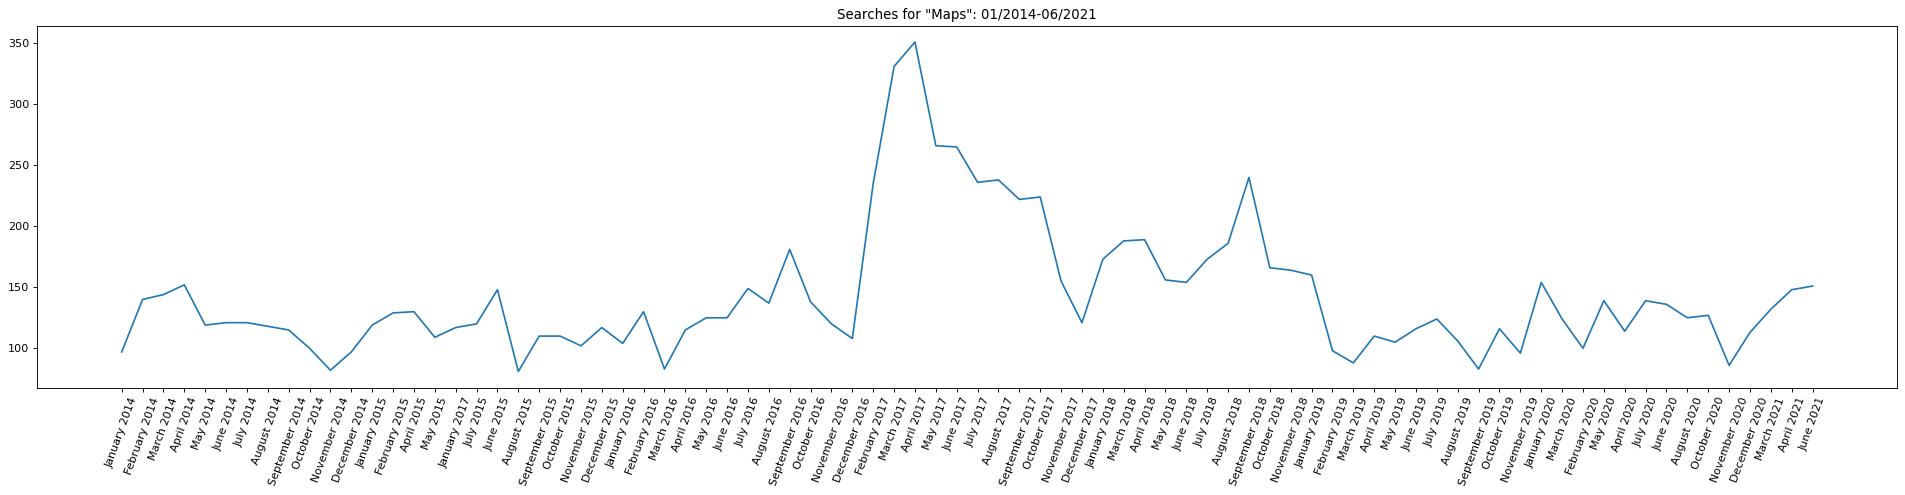

In [15]:
from matplotlib.pyplot import figure
figure(figsize=(30, 6), dpi=80)
plt.plot('month_year', 'query_count', data=searches_df)
plt.title('Searches for "Maps": 01/2014-06/2021')
plt.xticks(rotation = 70);
#put semicolon at the end to get rid of list of xticks above the plot in the output
